In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
youtube = pd.read_csv('USvideos1.csv')

In [3]:
youtube.head(10)

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,Science & Technology,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...
6,39idVpFF7NQ,17.14.11,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,Entertainment,2017-11-12T05:37:17.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,1970,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...
7,nc99ccSXST0,17.14.11,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,Science & Technology,2017-11-12T21:50:37.000Z,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,3432,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....
8,jr9QtXwC9vc,17.14.11,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,Film & Animation,2017-11-13T14:00:23.000Z,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,340,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th..."
9,TUmyygCMMGA,17.14.11,Why the rise of the robots won’t mean the end ...,Vox,25,News & Politics,2017-11-13T13:45:16.000Z,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,2368,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo..."


In [4]:
def ganti_tanggal_trending(cols):
    year = cols[0:2]
    month = cols[6:8]
    day = cols[3:5]
    cols = '20'+'{}.{}.{}'.format(year,month,day)
    return cols

youtube['trending_date'] = youtube['trending_date'].apply(ganti_tanggal_trending)

In [5]:
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'],utc='none')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])

In [6]:
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']

In [7]:
youtube['delta_like'] = youtube['likes']-youtube['dislikes']

In [8]:
youtube_delta_0 = youtube[(youtube['delta_like'] == 0)]
youtube_delta_0

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,delta_like
192,wRGldR_SQAA,2017-11-14 00:00:00+00:00,Apple Clips sample,Steve Kovach,22,People & Blogs,2017-11-09 18:01:04+00:00,[none],2259,0,0,0,https://i.ytimg.com/vi/wRGldR_SQAA/default.jpg,False,False,False,Clips 2.0 lets you use augmented reality and s...,4 days 05:58:56,0
1435,Kn5UgGQukYQ,2017-11-21 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",15058,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,402 days 02:45:09,0
1667,Kn5UgGQukYQ,2017-11-22 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",34207,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,403 days 02:45:09,0
1868,_akwfRuL4os,2017-11-23 00:00:00+00:00,Highlights of the EA predatory behavior announ...,chris lee,22,People & Blogs,2017-11-21 19:29:03+00:00,[none],160012,0,0,1722,https://i.ytimg.com/vi/_akwfRuL4os/default.jpg,False,True,False,The State of Hawaii announces action to addres...,1 days 04:30:57,0
1914,Kn5UgGQukYQ,2017-11-23 00:00:00+00:00,Breaking Bad's Bryan Cranston on Meeting Charl...,hudsonunionsociety,1,Film & Animation,2016-10-14 21:14:51+00:00,"Breaking Bad|""Bryan Cranston""|""malcom in the m...",36137,0,0,0,https://i.ytimg.com/vi/Kn5UgGQukYQ/default.jpg,True,True,False,The Hudson Union www.hudsonunionsociety.com is...,404 days 02:45:09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28135,UwbO_xb1-Xo,2018-04-05 00:00:00+00:00,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,People & Blogs,2018-03-21 18:42:04+00:00,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1040664,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",14 days 05:17:56,0
28346,UwbO_xb1-Xo,2018-04-06 00:00:00+00:00,"KKW BEAUTY: Conceal, Bake, Brighten with Mario...",Kim Kardashian West,22,People & Blogs,2018-03-21 18:42:04+00:00,"Mario Dedivanovic|""KKW BEAUTY""|""CONCEALER""|""CO...",1045731,0,0,0,https://i.ytimg.com/vi/UwbO_xb1-Xo/default.jpg,True,True,False,"Watch me conceal, bake and brighten with Mario...",15 days 05:17:56,0
28550,9TUBf6l7FBg,2018-04-14 00:00:00+00:00,Coachella 2018 LIVE Channel 1,Coachella,10,Music,2018-04-05 06:48:28+00:00,[none],3598220,0,0,0,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,8 days 17:11:32,0
28751,9TUBf6l7FBg,2018-04-15 00:00:00+00:00,Coachella 2018 LIVE Channel 1,Coachella,10,Music,2018-04-05 06:48:28+00:00,[none],11137071,0,0,2,https://i.ytimg.com/vi/9TUBf6l7FBg/default_liv...,False,True,False,For more cameras and VR180 immersive experienc...,9 days 17:11:32,0


In [9]:
from scipy.stats import shapiro,normaltest,anderson

def trynormal(data):
    result={'Anderson': {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}, 'Shapiro': shapiro(data)[1],
            'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [10]:
trynormal(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'])

{'Anderson': {15.0: 0.558,
  10.0: 0.635,
  5.0: 0.762,
  2.5: 0.889,
  1.0: 1.057,
  'stat': 30.011856798477254},
 'Shapiro': 6.093685768783008e-20,
 'K^2': 7.23626649326126e-26}

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.



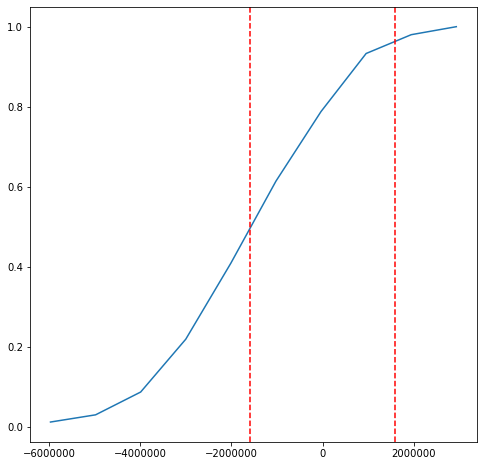

In [11]:
def mean_differencies(x1, x2, n_boot):
    ori_mean = x1.mean() - x2.mean()
    mean_diff = []
    for i in range(n_boot):
        x1_mean = x1.sample(len(x1), replace = True).mean()
        x2_mean = x2.sample(len(x2), replace = True).mean()
        mean_diff.append(x1_mean-x2_mean)

    hist,hist_edges = np.histogram(mean_diff, bins = 10, normed = True)
    dx = hist_edges[1] - hist_edges[0]
    F1 = np.cumsum(hist)*dx
    plt.figure(figsize = (8,8))
    plt.plot(hist_edges[1:], F1)
    plt.axvline(ori_mean, ls = '--', c = 'r')
    plt.axvline(ori_mean*-1, ls= '--' , c = 'r')

mean_differencies(youtube_delta_0[youtube_delta_0['trending_gap'].dt.days <= 5]['views'],
                  youtube_delta_0[youtube_delta_0['trending_gap'].dt.days > 5]['views'],1000)

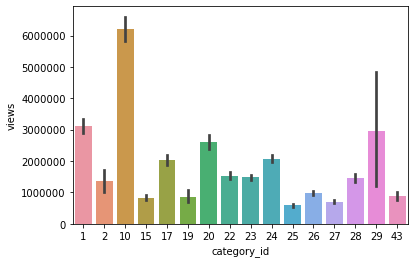

In [12]:
sns.barplot(data = youtube, x = 'category_id', y ='views')

## QUESTION

###### Saya pernah membaca bahwa Trend video juga tergantung kategori, jika kita barplot kan category 10 dan 29 memiliki mean yang tertinggi (walau mean dari 29 besar jaraknya) berarti mereka menarik banyak view. Tetapi apakah mereka berbeda secara view, like, dan dislikesnya?

##### H0 = Tidak ada perbedaan antara kategori 10 dan 29 dalam view, like, dan dislike.
##### H1 = Ada perbedaan antara kategori 10 dan 29 dalam view, like, dan dislike.

#### Dari hasil test distribusi normal menggunakan:
- metode Anderson, terlihat bahwa H1 dapat diterima karena Statnya lebih dari Alpha yang telah ditentukan(dalam case ini 95%(0.05))
- metode Shapiro & K-Square, juga dapat dilihat bahwa H1 dapat diterima karena nilai p-valuenya lebih kecil dari Alpha(0.05)

In [13]:
trynormal(youtube[(youtube['category_id']==10)]['views'])

C:\Users\catin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning:

p-value may not be accurate for N > 5000.



{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1190.1770512259227},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [14]:
trynormal(youtube[(youtube['category_id']==29)]['views'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.03917848327174},
 'Shapiro': 3.174725022800362e-13,
 'K^2': 7.110325304841888e-09}

In [15]:
trynormal(youtube[(youtube['category_id']==10)]['likes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1059.63100476604},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [16]:
trynormal(youtube[(youtube['category_id']==29)]['likes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.770348198612865},
 'Shapiro': 2.335269564529563e-13,
 'K^2': 4.61018340359511e-08}

In [17]:
trynormal(youtube[(youtube['category_id']==10)]['dislikes'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.917,
  1.0: 1.091,
  'stat': 1398.5780660629043},
 'Shapiro': 0.0,
 'K^2': 0.0}

In [18]:
trynormal(youtube[(youtube['category_id']==29)]['dislikes'])

{'Anderson': {15.0: 0.542,
  10.0: 0.617,
  5.0: 0.741,
  2.5: 0.864,
  1.0: 1.028,
  'stat': 15.941865855475612},
 'Shapiro': 1.6795371788214802e-13,
 'K^2': 5.222212259578384e-09}

#### Dari hasil test menggunakan metode Mannwhitneyu menunjukkan hasil yang sama, yaitu p-value lebih kecil dari Alpha (0.05) yang berarti H0 ditolak (H1 diterima).

In [19]:
from scipy.stats import mannwhitneyu
result1 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['views'],
                           youtube[(youtube['category_id']==29)]['views']))
print('U-Statistic:',result1[0])
print('P-value:',result1[1])

U-Statistic: 78978.5
P-value: 4.876291818247057e-14


In [20]:
result2 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['likes'],
                           youtube[(youtube['category_id']==29)]['likes']))
print('U-Statistic:',result2[0])
print('P-value:',result2[1])

U-Statistic: 81875.0
P-value: 2.2471001015367116e-13


In [21]:
result3 = list(mannwhitneyu(youtube[(youtube['category_id']==10)]['dislikes'],
                           youtube[(youtube['category_id']==29)]['dislikes']))
print('U-Statistic:',result3[0])
print('P-value:',result3[1])

U-Statistic: 91647.5
P-value: 2.876019645817286e-11


## Question 2

How about season publish time? Would there any differences in Viewer, Likes, and Dislike?

US have 4 season Spring runs from March to May; Summer runs from June to August; Fall (autumn) runs from September to November; and Winter runs from December to February.

In [22]:
youtube['month_name'] = youtube['publish_time'].dt.month_name()
youtube

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,delta_like,month_name
0,2kyS6SvSYSE,2017-11-14 00:00:00+00:00,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0 days 06:46:59,54561,November
1,1ZAPwfrtAFY,2017-11-14 00:00:00+00:00,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0 days 16:30:00,91039,November
2,5qpjK5DgCt4,2017-11-14 00:00:00+00:00,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1 days 04:54:36,140694,November
3,puqaWrEC7tY,2017-11-14 00:00:00+00:00,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0 days 12:59:56,9506,November
4,d380meD0W0M,2017-11-14 00:00:00+00:00,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1 days 05:58:19,130246,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14 00:00:00+00:00,The Cat Who Caught the Laser,AaronsAnimals,15,Pets & Animals,2018-05-18 13:00:04+00:00,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,26 days 10:59:56,36775,May
40945,1h7KV2sjUWY,2018-06-14 00:00:00+00:00,True Facts : Ant Mutualism,zefrank1,22,People & Blogs,2018-05-18 01:00:06+00:00,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,26 days 22:59:54,59626,May
40946,D6Oy4LfoqsU,2018-06-14 00:00:00+00:00,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,2018-05-18 17:34:22+00:00,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,26 days 06:25:38,47036,May
40947,oV0zkMe1K8s,2018-06-14 00:00:00+00:00,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,2018-05-17 17:00:04+00:00,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,27 days 06:59:56,190111,May


In [23]:
def f(row):
    if ((row['month_name'] == 'March') or (row['month_name'] == 'April') or (row['month_name'] =='May')) :
        val = 'Spring'
    elif ((row['month_name'] == 'June') or (row['month_name'] == 'July') or (row['month_name'] == 'August')):
        val = 'Summer'
    elif ((row['month_name'] ==  'September') or (row['month_name'] ==  'October') or (row['month_name'] == 'November')):
        val = 'Autumn'
    else:
        val = 'Winter'
    return val

youtube['Season'] = youtube.apply(f, axis = 1)

In [24]:
youtube['Season'].value_counts()

Spring    17948
Winter    17891
Autumn     4305
Summer      805
Name: Season, dtype: int64

## TEST NORMALITY BASED ON VIEWS FROM EVERY SEASONS

In [25]:
print(trynormal(youtube[(youtube['Season']=='Spring')]['views']))
print(trynormal(youtube[(youtube['Season']=='Winter')]['views']))
print(trynormal(youtube[(youtube['Season']=='Autumn')]['views']))
print(trynormal(youtube[(youtube['Season']=='Summer')]['views']))

{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3716.1813218754905}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3746.367311313432}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1076.0919247755273}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'stat': 104.89138809636574}, 'Shapiro': 5.047589172375137e-40, 'K^2': 1.1802462873285782e-131}


## TEST NORMALITY BASED ON LIKES FROM EVERY SEASONS

In [26]:
print(trynormal(youtube[(youtube['Season']=='Spring')]['likes']))
print(trynormal(youtube[(youtube['Season']=='Winter')]['likes']))
print(trynormal(youtube[(youtube['Season']=='Autumn')]['likes']))
print(trynormal(youtube[(youtube['Season']=='Summer')]['likes']))

{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3560.9829258459213}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3660.3000707250976}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1086.661115004069}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'stat': 164.14229803337196}, 'Shapiro': 2.802596928649634e-45, 'K^2': 5.1677471996842025e-164}


## TEST NORMALITY BASED ON DISLIKES FROM EVERY SEASONS

In [27]:
print(trynormal(youtube[(youtube['Season']=='Spring')]['dislikes']))
print(trynormal(youtube[(youtube['Season']=='Winter')]['dislikes']))
print(trynormal(youtube[(youtube['Season']=='Autumn')]['dislikes']))
print(trynormal(youtube[(youtube['Season']=='Summer')]['dislikes']))

{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 4208.5911645473025}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 6110.555792955907}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1048.6575806115661}, 'Shapiro': 0.0, 'K^2': 0.0}
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'stat': 160.83754551439586}, 'Shapiro': 0.0, 'K^2': 3.942257894180237e-194}


## KESIMPULAN 1
Distribusi data tidak normal karena nilai stat dari setiap musim lebih besar dari alpha yang telah ditentukan (0.05).

## VARIANCE TEST  BASED ON VIEWS PER-SEASON

In [28]:
from scipy.stats import levene, kruskal
levene(youtube[(youtube['Season']=='Spring')]['views'],
       youtube[(youtube['Season']=='Winter')]['views'],
       youtube[(youtube['Season']=='Autumn')]['views'],
       youtube[(youtube['Season']=='Summer')]['views'])

LeveneResult(statistic=231.1359391780419, pvalue=1.0199641428047364e-148)

## VARIANCE TEST  BASED ON LIKES PER-SEASON

In [29]:
levene(youtube[(youtube['Season']=='Spring')]['likes'],
       youtube[(youtube['Season']=='Winter')]['likes'],
       youtube[(youtube['Season']=='Autumn')]['likes'],
       youtube[(youtube['Season']=='Summer')]['likes'])

LeveneResult(statistic=199.1602384582668, pvalue=3.047203619464923e-128)

## VARIANCE TEST  BASED ON DISLIKES PER-SEASON

In [30]:
levene(youtube[(youtube['Season']=='Spring')]['dislikes'],
       youtube[(youtube['Season']=='Winter')]['dislikes'],
       youtube[(youtube['Season']=='Autumn')]['dislikes'],
       youtube[(youtube['Season']=='Summer')]['dislikes'])

LeveneResult(statistic=12.664904236686521, pvalue=2.857565325923137e-08)

## KESIMPULAN 2
Dari ketiga test diatas dapat disimpulkan bahwa data variance dari tiap season based on views, likes, dan dislikes = unequal karena nilai pvalue tiap musim dari view, likes, dan dislikes lebih kecil dari alpha(0.05) yang telah ditentukan.

## GROUP TEST

In [31]:
kruskal(youtube[youtube['Season']=='Spring']['views'],
       youtube[youtube['Season']=='Winter']['views'],
       youtube[youtube['Season']=='Autumn']['views'],
       youtube[youtube['Season']=='Summer']['views'])

KruskalResult(statistic=7047.096841063085, pvalue=0.0)

In [32]:
kruskal(youtube[youtube['Season']=='Spring']['likes'],
       youtube[youtube['Season']=='Winter']['likes'],
       youtube[youtube['Season']=='Autumn']['likes'],
       youtube[youtube['Season']=='Summer']['likes'])

KruskalResult(statistic=5308.643036224076, pvalue=0.0)

In [33]:
kruskal(youtube[youtube['Season']=='Spring']['dislikes'],
       youtube[youtube['Season']=='Winter']['dislikes'],
       youtube[youtube['Season']=='Autumn']['dislikes'],
       youtube[youtube['Season']=='Summer']['dislikes'])

KruskalResult(statistic=4673.571500076225, pvalue=0.0)

### KESIMPULAN 3
Karena distribusi data tidak normal, memiliki unequal variance maka dilakukan group test menggunakan metode kruskal untuk mengetahui perbedaan dari 1 grup terhadap grup lain. Hasilnya terdapat perbedaan antara tiap grup yang ditunjukkan oleh nilai pvalue = 0 yang lebih kecil dari nilai alpha (0.05).

In [34]:
from pingouin import pairwise_ttests
youtube_season = youtube[(youtube['Season']=='Spring') | 
                         (youtube['Season']=='Winter') | 
                         (youtube['Season']=='Autumn') |
                         (youtube['Season']=='Summer')
                          ]

pairwise_ttests(data = youtube_season, dv = 'likes', between = 'Season', parametric =  False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Season,Autumn,Spring,False,False,21531502.0,two-sided,0.000000e+00,-0.216
1,Season,Autumn,Summer,False,False,909416.5,two-sided,6.920625e-102,-0.396
2,Season,Autumn,Winter,False,False,36678916.5,two-sided,1.221096e-06,0.027
3,Season,Spring,Summer,False,False,6649032.5,two-sided,1.298305e-04,-0.086
4,Season,Spring,Winter,False,False,226079681.0,two-sided,0.000000e+00,0.281
5,Season,Summer,Winter,False,False,10382826.0,two-sided,4.104912e-100,0.637


In [37]:
pairwise_ttests(data = youtube_season, dv = 'views', between = 'Season', parametric =  False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Season,Autumn,Spring,False,False,18752760.5,two-sided,0.000000e+00,-0.254
1,Season,Autumn,Summer,False,False,814837.0,two-sided,3.671005e-126,-0.369
2,Season,Autumn,Winter,False,False,36058817.5,two-sided,8.300967e-11,-0.001
3,Season,Spring,Summer,False,False,6734961.0,two-sided,1.134166e-03,0.044
4,Season,Spring,Winter,False,False,236050929.0,two-sided,0.000000e+00,0.309
5,Season,Summer,Winter,False,False,10706892.5,two-sided,3.980226e-121,0.480


In [36]:
pairwise_ttests(data = youtube_season, dv = 'dislikes', between = 'Season', parametric =  False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,Season,Autumn,Spring,False,False,21521402.0,two-sided,0.000000e+00,-0.207
1,Season,Autumn,Summer,False,False,835874.0,two-sided,1.547882e-120,-0.556
2,Season,Autumn,Winter,False,False,35099503.5,two-sided,1.615794e-19,-0.044
3,Season,Spring,Summer,False,False,6170166.5,two-sided,2.323327e-12,-0.090
4,Season,Spring,Winter,False,False,219874019.0,two-sided,0.000000e+00,0.047
5,Season,Summer,Winter,False,False,10487552.0,two-sided,1.106743e-106,0.073


## KESIMPULAN 4
digunakan metode ttest untuk membandingkan mean tiap grup dengan grup lain untuk mengetahui apakah ada perbedaan antara grup 1 dengan grup dengan yang lain. hasilnya pvalue dari perbandingan tiap grup < alpha (0.05)

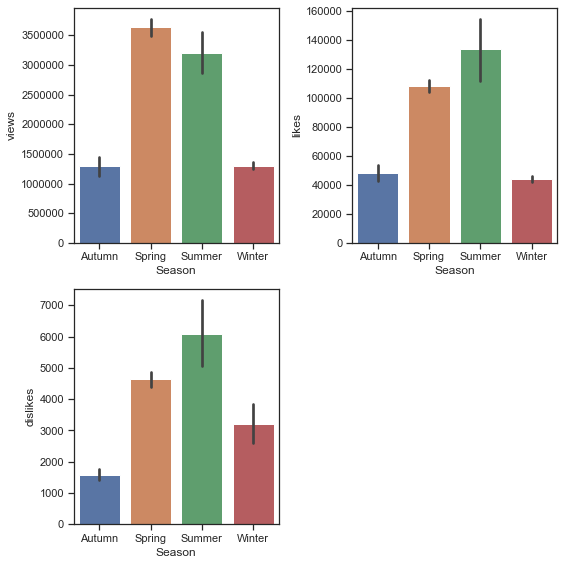

In [47]:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
sns.barplot(data=youtube, x='Season',y='views')
plt.subplot(2,2,2)
sns.barplot(data=youtube, x='Season',y='likes')
plt.subplot(2,2,3)
sns.barplot(data=youtube, x='Season',y='dislikes')
plt.tight_layout()

## CHISQUARE

In [54]:
from scipy.stats import chisquare

In [67]:
youtube.groupby('Season').count()['views']

Season
Autumn     4305
Spring    17948
Summer      805
Winter    17891
Name: views, dtype: int64

In [65]:
chisquare(np.array(youtube.groupby('Season').count()['views']))

Power_divergenceResult(statistic=23658.15866077316, pvalue=0.0)

In [68]:
from mahalanobis import Mahalanobis

In [69]:
youtube_out_test = youtube[['views','likes','dislikes']]

In [70]:
youtube_out_test['mahala_pack'] = Mahalanobis(np.array(youtube_out_test),len(youtube_out_test)).distances

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
youtube_out_test

,views,likes,dislikes,mahala_pack
0,748374,57527,2966,0.311529
1,2418783,97185,6146,0.191899
2,3191434,146033,5339,0.429749
3,343168,10172,666,0.290097
4,2095731,132235,1989,0.547969
...,...,...,...,...
40944,1685609,38160,1385,0.179273
40945,1064798,60008,382,0.245676
40946,1066451,48068,1032,0.187450
40947,5660813,192957,2846,0.599505


In [73]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

# Mahala distance more than 9.21 is considered as outlier
# if using P-value then the H0 is not outlier and the H1 is outlier

9.21034037197618

In [74]:
youtube_out_test['p-value'] = 1 - chi2.cdf(youtube_out_test['mahala_pack'], 2)

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
youtube_out_test

,views,likes,dislikes,mahala_pack,p-value
0,748374,57527,2966,0.311529,0.855761
1,2418783,97185,6146,0.191899,0.908510
2,3191434,146033,5339,0.429749,0.806643
3,343168,10172,666,0.290097,0.864981
4,2095731,132235,1989,0.547969,0.760344
...,...,...,...,...,...
40944,1685609,38160,1385,0.179273,0.914264
40945,1064798,60008,382,0.245676,0.884407
40946,1066451,48068,1032,0.187450,0.910533
40947,5660813,192957,2846,0.599505,0.741001


In [77]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Non-Outlier'
youtube_out_test['Out'] = youtube_out_test['p-value'].apply(name_outlier)

C:\Users\catin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



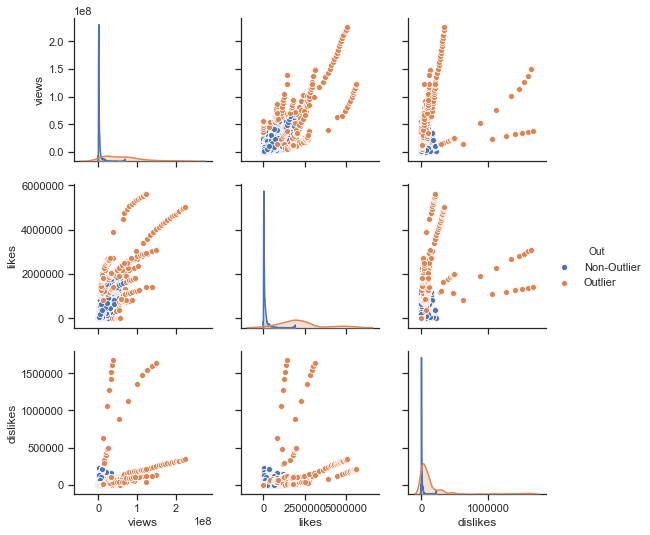

In [78]:
sns.pairplot(youtube_out_test[['views','likes','dislikes','Out']],hue = 'Out')

In [79]:
from pingouin import corr
corr(youtube['views'],youtube['likes'],method = 'percbend')

,n,r,CI95%,r2,adj_r2,p-val,power
percbend,40949,0.838,"[0.83, 0.84]",0.702,0.702,0.0,1.0
